In [1]:
technique = 'atacseq'
data_path = f"../data/ATAC_seq"
root_save_path = f"../saved_results/{technique}_new_trans_finetune_v2"
test_batches = ['s1d1', 's1d2', 's1d3', 's2d1', 's2d4', 's2d5', 's3d3', 's3d6', 's3d7',
       's3d10', 's4d1', 's4d8', 's4d9']
device = "cuda:0"

In [2]:
import scanpy as sc
adata_atac = sc.read_h5ad(f'{data_path}/atac_processed.h5ad')
adata_atac.X = adata_atac.X.toarray()
adata_atac.obs['label'] = list(adata_atac.obs['cell_type'])
adata_gex  = sc.read_h5ad(f'{data_path}/gex_processed.h5ad')
adata_gex.obs['label'] = list(adata_gex.obs['cell_type'])

def split_data(test_batch):
    adata_atac_train = adata_atac[adata_atac.obs['batch']!=test_batch]
    adata_atac_test  = adata_atac[adata_atac.obs['batch']==test_batch]

    adata_gex_train = adata_gex[adata_gex.obs['batch']!=test_batch]
    adata_gex_test  = adata_gex[adata_gex.obs['batch']==test_batch]

    return [adata_atac_train, adata_gex_train], [adata_atac_test, adata_gex_test]

In [3]:
adatas_train, adatas_test = split_data("s1d1")
adata_atac, adata_gex = adatas_train


In [8]:
import matplotlib.pyplot as plt
import numpy as np
print(np.unique(adatas_train[0].X))
print(np.any(np.isnan(adatas_train[1].X)))
print(np.any(np.isnan(adatas_train[0].X)))
gex = adatas_train[1].X
print(np.min(gex), np.max(gex))


[0. 1.]
False
False
-1.6383456 4.0


In [9]:
print(adatas_test[0].X.toarray().shape)
print(adatas_train[0].X.toarray().shape)
print(adatas_test[0])
print(adatas_train[0])
print(adatas_test[1])
# print(adatas_train[0])
print(adatas_train[1])
# print(adatas_train)

(6224, 13634)
(63025, 13634)
View of AnnData object with n_obs × n_vars = 6224 × 13634
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes', 'GEX_size_factors', 'GEX_phase', 'ATAC_nCount_peaks', 'ATAC_atac_fragments', 'ATAC_reads_in_peaks_frac', 'ATAC_blacklist_fraction', 'ATAC_nucleosome_signal', 'cell_type', 'batch', 'ATAC_pseudotime_order', 'GEX_pseudotime_order', 'Samplename', 'Site', 'DonorNumber', 'Modality', 'VendorLot', 'DonorID', 'DonorAge', 'DonorBMI', 'DonorBloodType', 'DonorRace', 'Ethnicity', 'DonorGender', 'QCMeds', 'DonorSmoker', 'label'
    var: 'feature_types', 'gene_id', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'ATAC_gene_activity_var_names', 'dataset_id', 'genome', 'hvg', 'organism'
    obsm: 'ATAC_gene_activity', 'ATAC_lsi_full', 'ATAC_lsi_red', 'ATAC_umap', 'GEX_X_pca', 'GEX_X_umap', 'umap'
    layers: 'counts'
View of AnnData object with n_obs × n_vars = 63025 × 13634
    obs: 'GEX_pct_counts_mt', 'GEX_n_counts', 'GEX_n_genes',

In [13]:
assert adatas_train[0].obs['label'].equals(adatas_train[1].obs['label']) 
#assert adatas_train[0].var['label'].equals(adatas_train[1].var['label']) 
#print(adatas_train[1].var.keys())
#print(adatas_train[0].var.head())
#print(adatas_train[1].var.head())
#print(adatas_train[0].var.keys())
#print(adatas_train[1].var_names)
#print(adatas_train[0].obs.head())
#print(adatas_train[0].obs_names)
#print(adatas_train[0].to_df())
#print(adatas_train[0].obs["cell_type"].keys())
#print(adatas_train[0].to_df().head())
#print(adatas_train[0].obs["label"])
#print(adatas_train[0].obs.keys())
print(adatas_train[1].to_df().head())

                            ISG15  C1orf159     SMIM1     RPL22    GPR153  \
CTACCGGCAGTTGCGT-2-s1d2 -0.246707 -0.159569 -0.158076 -0.706706 -0.055429   
GATGCAGCAGCAACAG-2-s1d2 -0.246707 -0.159569 -0.158076  1.008367 -0.055429   
TGAGTGAAGAGGAAGG-2-s1d2 -0.246707 -0.159569 -0.158076  0.473720 -0.055429   
CCGCTAAAGGACCGCT-2-s1d2 -0.246707 -0.159569 -0.158076  0.542673 -0.055429   
CTAACCACAGTTTGGC-2-s1d2 -0.246707 -0.159569 -0.158076  1.095480 -0.055429   

                             ESPN  TNFRSF25      PER3   TNFRSF9    ERRFI1  \
CTACCGGCAGTTGCGT-2-s1d2 -0.087385 -0.179167 -0.124997 -0.071872 -0.077488   
GATGCAGCAGCAACAG-2-s1d2 -0.087385 -0.179167 -0.124997 -0.071872 -0.077488   
TGAGTGAAGAGGAAGG-2-s1d2 -0.087385  3.548768 -0.124997 -0.071872 -0.077488   
CCGCTAAAGGACCGCT-2-s1d2 -0.087385 -0.179167 -0.124997 -0.071872 -0.077488   
CTAACCACAGTTTGGC-2-s1d2 -0.087385 -0.179167 -0.124997 -0.071872 -0.077488   

                         ...    MT-CO2   MT-ATP8   MT-ATP6    MT-CO3  \
CT

In [25]:
# categorical cell types converted to a number

from unitednet.data import create_dataset
from unitednet.interface import UnitedNet
from unitednet.configs import atacseq_config
test_batch = "s1d1"
model = UnitedNet(f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
print(adatas_train[0].obs["label"])
dataset = create_dataset(model.model, adatas_train, True)
print(dataset.labels.numpy())



CTACCGGCAGTTGCGT-2-s1d2                NK
GATGCAGCAGCAACAG-2-s1d2      CD4+ T naive
TGAGTGAAGAGGAAGG-2-s1d2            CD8+ T
CCGCTAAAGGACCGCT-2-s1d2            CD8+ T
CTAACCACAGTTTGGC-2-s1d2      CD4+ T naive
                                ...      
AAACCGCGTTTGAGGC-12-s4d9     CD8+ T naive
TGACTTAAGTTCCCGT-12-s4d9       Lymph prog
GCTGTACCACCGTTCC-12-s4d9           CD8+ T
ACACTTGCAACTAGAA-12-s4d9             cDC2
CACTTAAAGTCTGGGC-12-s4d9    Naive CD20+ B
Name: label, Length: 63025, dtype: object
[14  4  5 ...  5 20 15]


##### Train

In [4]:
import sys
from unitednet.interface import UnitedNet
from unitednet.configs import *

In [5]:
test_batches = ['s4d9']

In [6]:
for test_batch in test_batches:
    print(test_batch)
    adatas_train, adatas_test = split_data(test_batch)
    model = UnitedNet(f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
    model.train(adatas_train, verbose=True)
    model.finetune(adatas_train, verbose=True)
    model.transfer(adatas_train, adatas_transfer = adatas_test, verbose=True)
    print(model.evaluate(adatas_test))


s4d9


training


  0%|          | 0/10 [00:00<?, ?it/s]



Losses                         Value
-------------------------  ---------
cross_entropy_loss_head_0  0.0307698
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/train_epoch_1.pt 



 10%|█         | 1/10 [07:27<1:07:11, 447.96s/it]



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[-0.01633099 -0.02025312]
                                [ 0.01139893  0.01515641]]
Confusion Matrix               [[1559    0    0    0    0    0    0    0    0    0    0    0    0    0
                                    0   30    0    2    0    0    0    0]
                                [   0 9870   16    1    1    0    0    1   18    0    5    1    0    0
                                    1    1    0    0    1    0    5    1]
                                [   0    1 1673    0    0    0    0    0    0    0    0    0    0    0
                                    0    0    0    0    0    0    0    0]
                                [   0    0    0 4479   50   11    0    0    0    0    0    0    0    0
                                    0    0    0    0    1    0    0    0]
                                [

 20%|██        | 2/10 [08:15<28:20, 212.62s/it]  



Metrics                        Value
-----------------------------  -----------------------------------------------------------------------
R2                             [[0.03316906 0.01057276]
                                [0.01404281 0.017998  ]]
Confusion Matrix               [[1591    0    0    0    0    0    0    0    0    0    0    0    0    0
                                    0    0    0    0    0    0    0    0]
                                [   0 9903    9    1    0    0    0    0    2    0    2    0    0    0
                                    0    0    0    0    1    0    4    0]
                                [   0    3 1671    0    0    0    0    0    0    0    0    0    0    0
                                    0    0    0    0    0    0    0    0]
                                [   0    0    0 4534    6    1    0    0    0    0    0    0    0    0
                                    0    0    0    0    0    0    0    0]
                                [   0

 30%|███       | 3/10 [08:58<15:45, 135.12s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.02984448 0.01001996]
                                [0.01616913 0.01887805]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9905     8     0     0     0     0     0     1     0     3     0
                                     0     0     0     0     0     0     1     0     3     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4540     1     0     0     0     0     0     0     0
                                     0   

 40%|████      | 4/10 [09:46<10:03, 100.53s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.0352585  0.01837673]
                                [0.01842753 0.01960334]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9909     7     0     0     0     0     0     0     0     1     0
                                     0     0     0     1     0     0     0     0     3     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4538     1     2     0     0     0     0     0     0
                                     0   

 50%|█████     | 5/10 [10:33<06:46, 81.36s/it] 



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.02261626 0.0114763 ]
                                [0.01746602 0.01982054]]
Confusion Matrix               [[ 1584     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     7     0     0     0     0]
                                [    0  9893    12     1     0     1     0     0     2     1     5     0
                                     1     0     1     0     0     0     1     0     3     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4540     1     0     0     0     0     0     0     0
                                     0   

 60%|██████    | 6/10 [11:20<04:39, 69.80s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.03561711 0.02008726]
                                [0.03620819 0.03894326]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9912     6     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     1     0     3     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4532     1     0     0     0     0     0     0     0
                                     0   

 70%|███████   | 7/10 [12:04<03:03, 61.20s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.03667223 0.01924716]
                                [0.0350062  0.03980045]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9913     6     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     1     0     1     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4540     1     0     0     0     0     0     0     0
                                     0   

 80%|████████  | 8/10 [12:48<01:51, 55.58s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.03109647 0.01677582]
                                [0.03913752 0.04555521]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9907     6     0     0     0     0     0     5     0     0     0
                                     0     0     0     0     0     0     0     0     4     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4486    51     1     2     0     0     0     0     0
                                     0   

 90%|█████████ | 9/10 [13:31<00:51, 51.75s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[ 0.02879854 -0.00197891]
                                [ 0.04554465  0.04804977]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9909     6     0     0     0     0     0     1     0     2     0
                                     0     0     0     1     0     0     0     0     3     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4539     0     1     0     0     0     0     0     0
                                     

100%|██████████| 10/10 [14:14<00:00, 85.48s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.03784098 0.0198736 ]
                                [0.05309318 0.05699264]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9908     6     0     0     0     0     0     4     0     0     1
                                     0     0     0     0     0     0     0     0     3     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4537     3     1     0     0     0     0     0     0
                                     0   

finetuning


  0%|          | 0/10 [00:00<?, ?it/s]



Losses                  Value
-------------------  --------
contrastive_loss     0.865074
reconstruction_loss  0.331416
translation_loss     0.336069
best_head            0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/finetune_epoch_1.pt 



 10%|█         | 1/10 [00:49<07:29, 49.92s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.03915417 0.02217771]
                                [0.05713223 0.06051018]]
Confusion Matrix               [[ 1590     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     1     0     0     0     0     0     0]
                                [    0  9912     6     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     3     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4536     3     1     0     0     0     0     0     0
                                     0   

 20%|██        | 2/10 [01:40<06:42, 50.36s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04135141 0.02243322]
                                [0.05923195 0.06183504]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9919     2     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     1     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

 30%|███       | 3/10 [02:30<05:52, 50.33s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04206022 0.0226732 ]
                                [0.06000414 0.06211635]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

 40%|████      | 4/10 [03:21<05:01, 50.26s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04227037 0.02278492]
                                [0.06050934 0.06261002]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

 50%|█████     | 5/10 [04:11<04:11, 50.31s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04272087 0.02209917]
                                [0.06078622 0.06271799]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

 60%|██████    | 6/10 [05:01<03:20, 50.15s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.0432637  0.02261788]
                                [0.06078954 0.0629885 ]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

 70%|███████   | 7/10 [05:51<02:30, 50.03s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04361505 0.02265106]
                                [0.06109115 0.06303241]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4540     0     0     0     0     0     0     0     1
                                     0   

 80%|████████  | 8/10 [06:41<01:40, 50.12s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04257586 0.02267005]
                                [0.06104591 0.0630857 ]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

 90%|█████████ | 9/10 [07:31<00:50, 50.06s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04271862 0.02302463]
                                [0.06130502 0.06316248]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

100%|██████████| 10/10 [08:19<00:00, 49.92s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04347537 0.02280011]
                                [0.0614033  0.06332743]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

transferring


  0%|          | 0/20 [00:00<?, ?it/s]



Losses                          Value
-------------------------  ----------
cross_entropy_loss_head_0  0.00208348
best_head                  0
best model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_best.pt 

model saved at ../saved_results/atacseq_new_trans_finetune_v2/s4d9/transfer_epoch_1.pt 



  5%|▌         | 1/20 [00:43<13:52, 43.84s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.03238865 0.00514666]
                                [0.05589017 0.05826942]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9904    17     0     0     0     0     0     1     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4533     5     3     0     0     0     0     0     0
                                     0   

 10%|█         | 2/20 [01:27<13:11, 43.95s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.03910624 0.02023195]
                                [0.05913866 0.06472554]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     3  1671     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

 15%|█▌        | 3/20 [02:11<12:25, 43.83s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.00447395 0.01132082]
                                [0.05250229 0.06238773]]
Confusion Matrix               [[ 1590     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     1     0     0     0     0     0     0]
                                [    0  9848    64     0     0     0     0     0     1     3     1     0
                                     0     0     0     0     0     0     1     0     3     1]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4530    10     1     0     0     0     0     0     0
                                     0   

 20%|██        | 4/20 [03:00<12:16, 46.04s/it]



Metrics                        Value
-----------------------------  -------------------------------------------------------------------------
R2                             [[0.04466563 0.02099692]
                                [0.06180097 0.06517334]]
Confusion Matrix               [[ 1591     0     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0  9922     0     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0  1674     0     0     0     0     0     0     0     0     0
                                     0     0     0     0     0     0     0     0     0     0]
                                [    0     0     0  4541     0     0     0     0     0     0     0     0
                                     0   

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import torch

/home/katzalis/thesis/UnitedNet/src/interface.py:143: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.model = torch.load(path,map_location=torch.device(device))


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


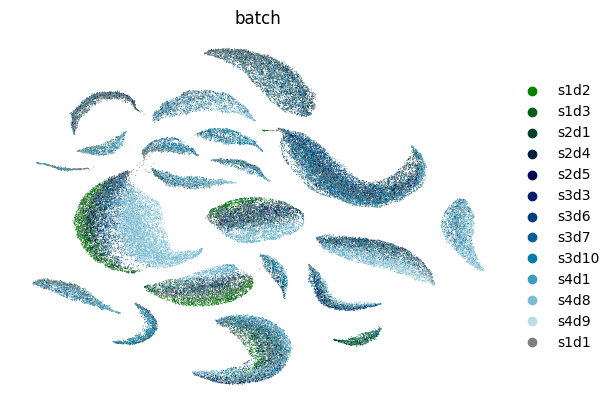

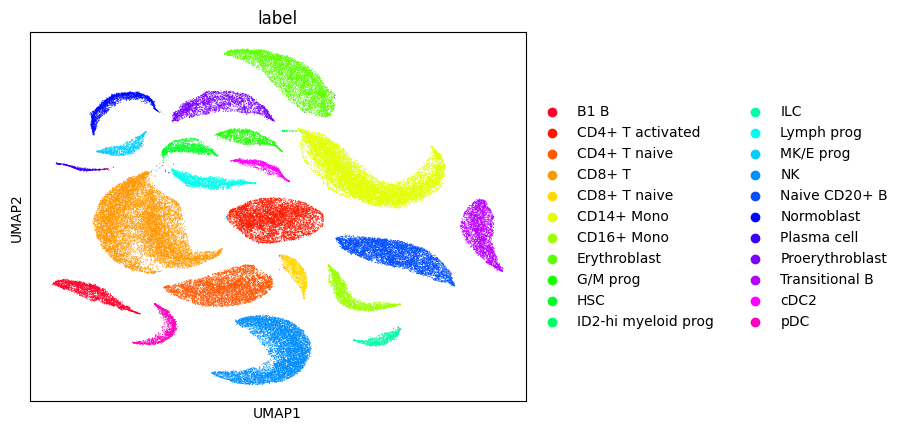

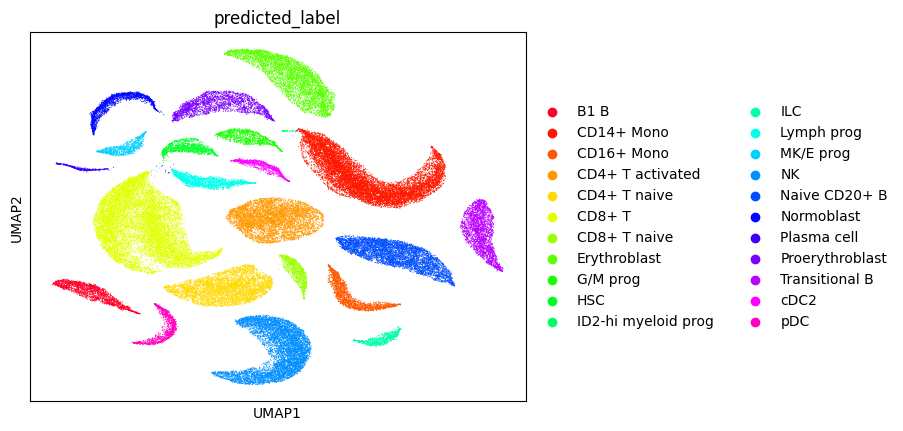

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


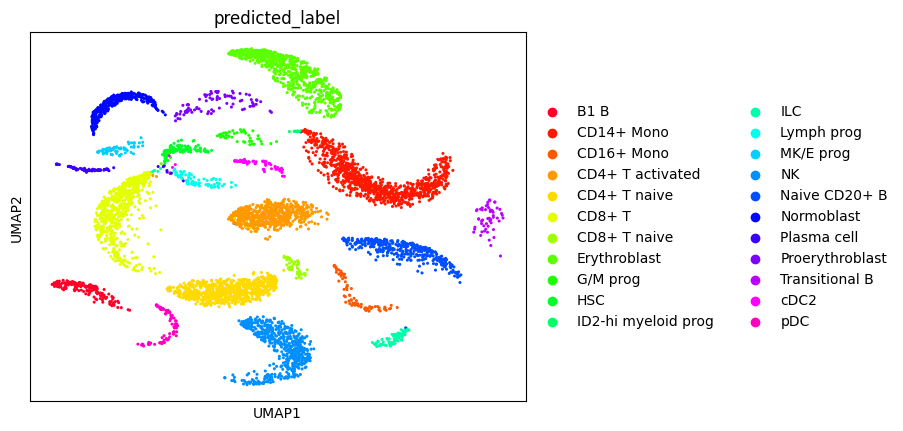

In [10]:
import scanpy as sc 
for test_batch in ['s1d1']:
    model = UnitedNet(f"{root_save_path}/{test_batch}", device=device, technique=atacseq_config)
    model.load_model(f"{root_save_path}/{test_batch}/transfer_best.pt",device=torch.device(device))
    model.model.device_in_use = device
    adatas = [adata_atac, adata_gex]
    adata_all = model.infer(adatas)
    adata_all.obs['batch'] = list(adatas[0].obs['batch'])
    adata_all.obs['label'] = list(adatas[0].obs['label'])

    cmap_wt = plt.get_cmap('ocean')
    new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
    size_umap = 120000 / adatas[0].shape[0]

    fig,ax=plt.subplots()
    ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
    sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
               ax=ax,save=f'ATACseq_{test_batch}_batch_label.pdf')

    fig,ax=plt.subplots()
    sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
               ax=ax,save=f'ATACseq_{test_batch}_gt_label.pdf')

    fig,ax=plt.subplots()
    sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
               ax=ax,save=f'ATACseq_{test_batch}_predict_label.pdf')
    fig,ax=plt.subplots()
    sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_batch_label_test.pdf')

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


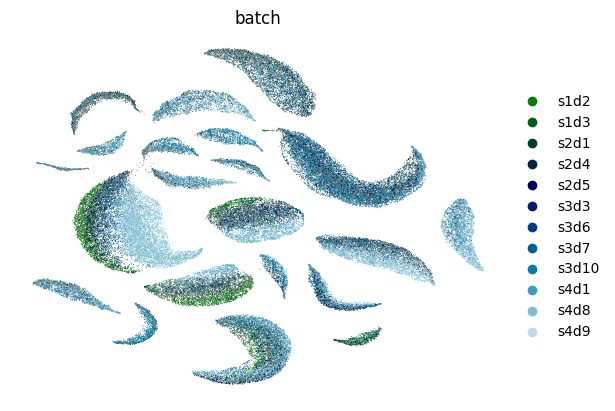

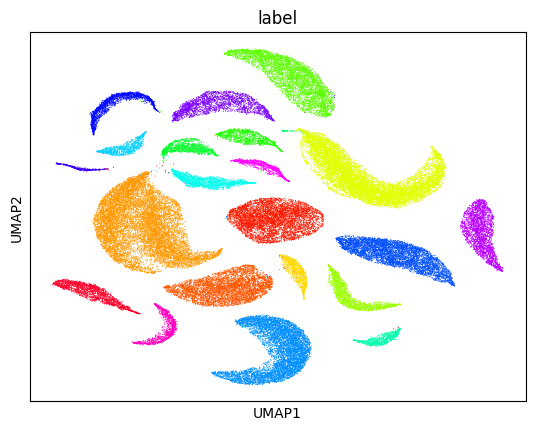

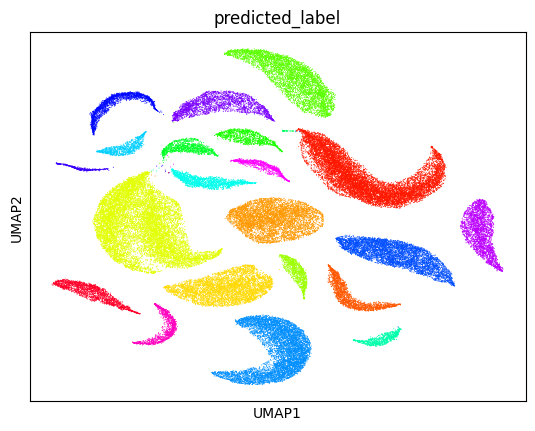

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


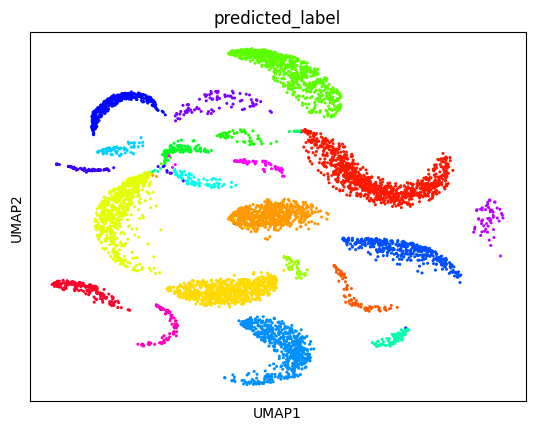

In [11]:
import matplotlib
matplotlib.rcParams['savefig.dpi'] = 1200
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_gt_label.png',legend_loc =None)

fig,ax=plt.subplots()
sc.pl.umap(adata_all,color=['predicted_label'],size=size_umap*1.2,frameon = True,palette='gist_rainbow',
           ax=ax,save=f'ATACseq_{test_batch}_predict_label.png',legend_loc =None)
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['predicted_label'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_batch_label_test.png',legend_loc =None)

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


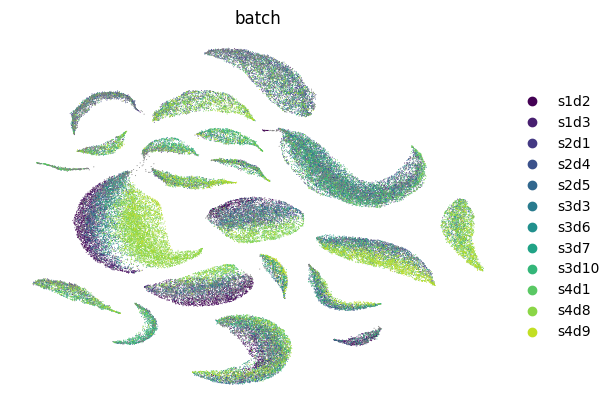

In [12]:
cmap_wt = plt.get_cmap('viridis')
new_cmap = list(cmap_wt(np.linspace(0, 0.91, 12)))
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_all[adata_all.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label.png',legend_loc =None)


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c
/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/anndata/_core/anndata.py:1209: ImplicitModificationWarning: Trying to modify attribute `.obs` of view, initializing view as actual.
  df[key] = c


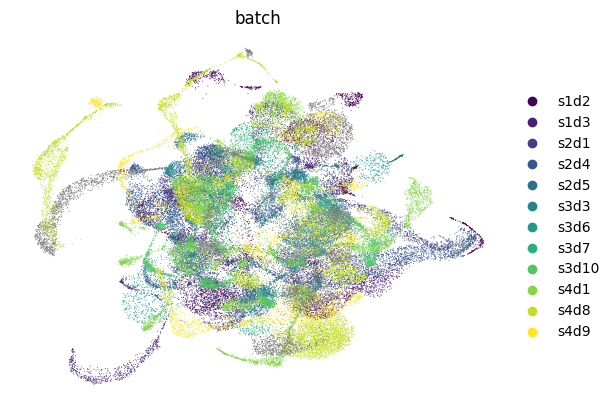

: 

In [21]:

cmap_wt = plt.get_cmap('viridis')
new_cmap = list(cmap_wt(np.linspace(0, 1, 12)))
fig,ax=plt.subplots()
ax = sc.pl.umap(adata_atac[adata_atac.obs['batch']!=test_batch],color=['batch'],size=size_umap,frameon = False,palette=new_cmap,ax=ax,show=False)
sc.pl.umap(adata_atac[adata_atac.obs['batch']==test_batch],color=['batch'],size=size_umap*1.2,frameon = True,palette=['grey'],
           ax=ax,save=f'ATACseq_{test_batch}_batch_label_atac_only.png',legend_loc =None)


/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


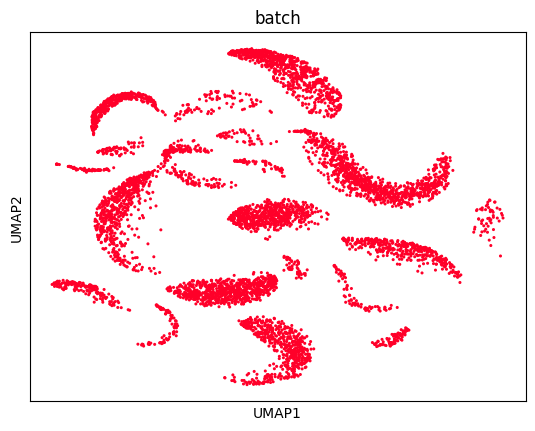

In [19]:
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['batch']==test_batch],color=['batch'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_batch_label_test_colored_batch.png',legend_loc =None)

/home/katzalis/thesis/UnitedNet/venv/lib/python3.10/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


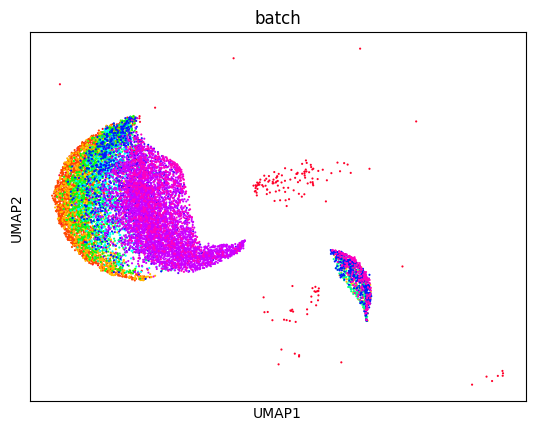

In [20]:
fig,ax=plt.subplots()
sc.pl.umap(adata_all[adata_all.obs['label'].isin(['CD8+ T','CD8+ T naive'])],color=['batch'],frameon = True,palette='gist_rainbow',
       ax=ax,save=f'ATACseq_{test_batch}_CD8T_position.png',legend_loc =None)

In [15]:
import pandas as pd
adata_atac.var_names = np.append(pd.read_csv(f'{data_path}/annotated_ATAC_gene_names_10k.csv').iloc[:,0].values,'unknown')
adata_atac.var_names_make_unique()
adata_atac.var_names = adata_atac.var_names.astype(str)

CD8_T_cells


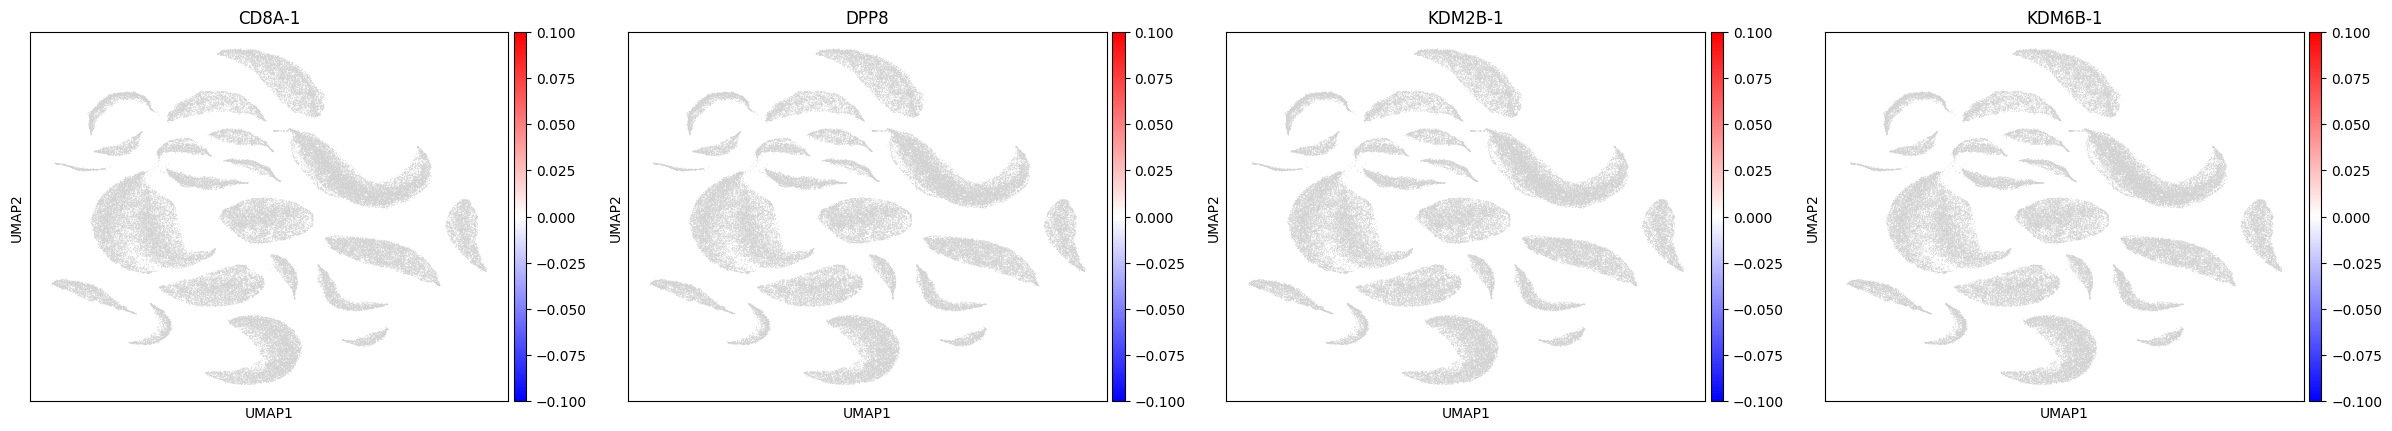

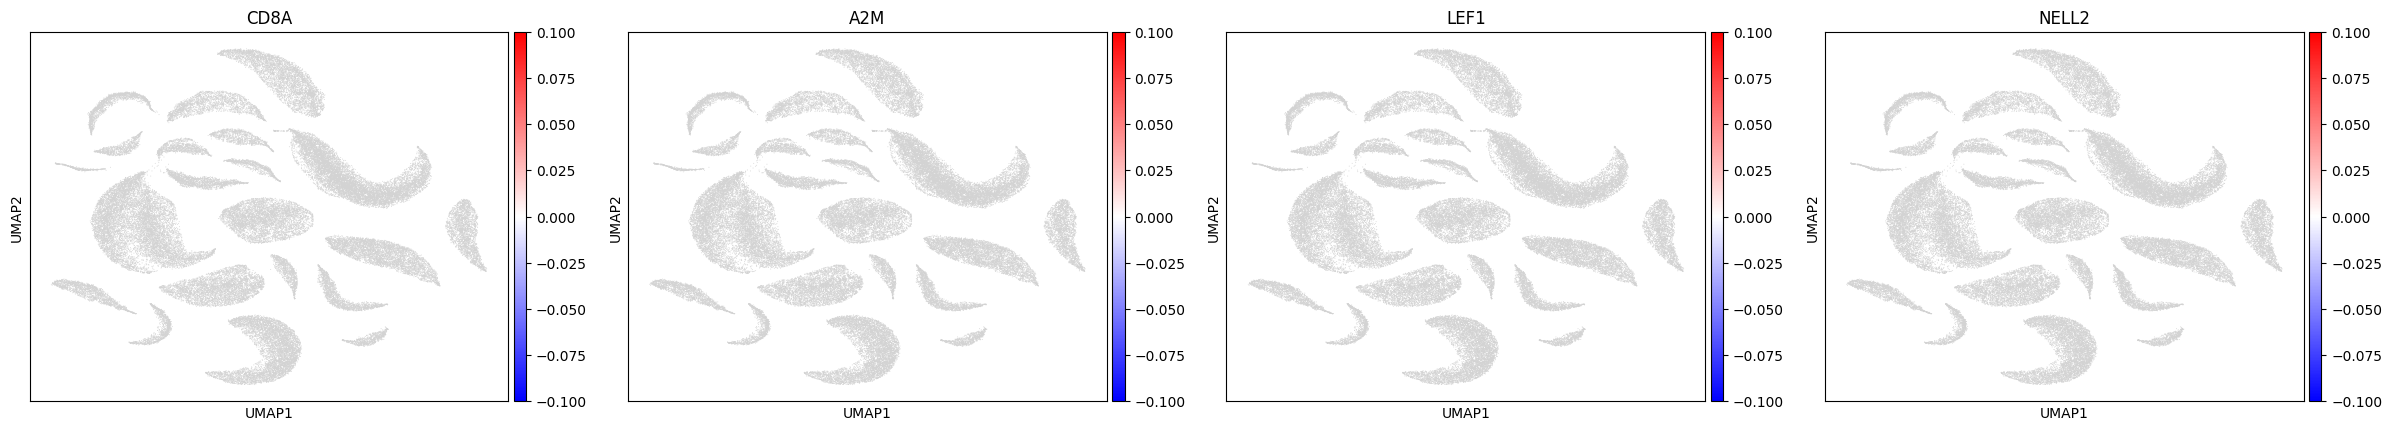

In [16]:
adatas_all_orig = [adata_atac,adata_gex]
cd8t_specific = [
    ['CD8A-1','DPP8','KDM2B-1','KDM6B-1'],
    ['CD8A','A2M','LEF1','NELL2'],
]
mods = ['ATAC','Gene']
for mjt in ['CD8_T_cells']:
    print(mjt)
    for ii in range(2):
        adata_all.obs[cd8t_specific[ii]] = adatas_all_orig[ii][:,cd8t_specific[ii]].X
        sc.pl.umap(adata_all,color=cd8t_specific[ii],cmap='bwr',show=True,save=f'{mjt}_{mods[ii]}.png')


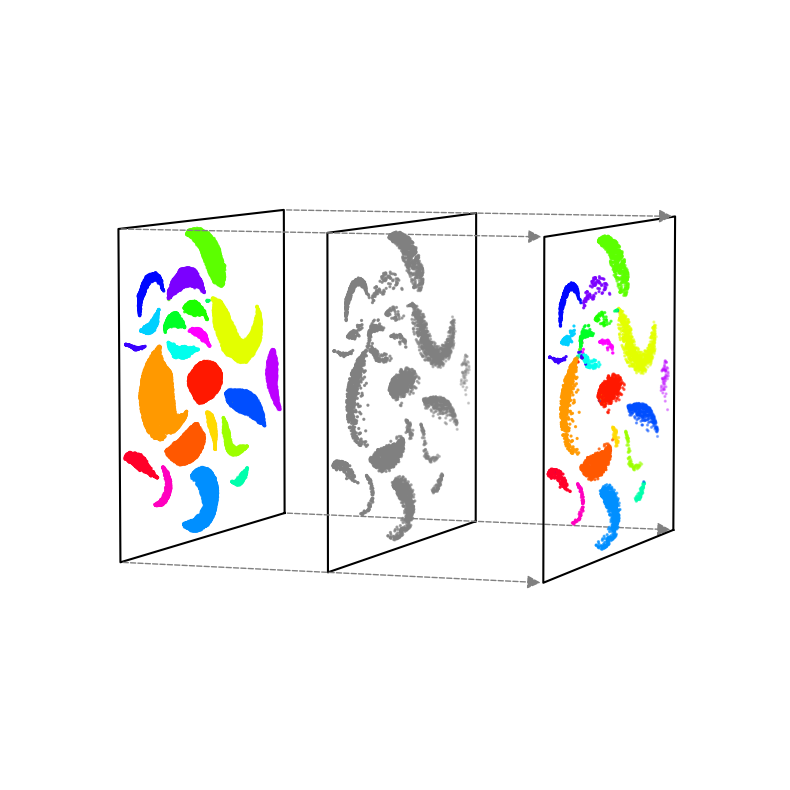

In [18]:
from matplotlib.patches import FancyArrowPatch
from mpl_toolkits.mplot3d import proj3d

save_fig = False

class Arrow3D(FancyArrowPatch):
    def __init__(self, xs, ys, zs, *args, **kwargs):
        super().__init__((0,0), (0,0), *args, **kwargs)
        self._verts3d = xs, ys, zs

    def do_3d_projection(self, renderer=None):
        xs3d, ys3d, zs3d = self._verts3d
        xs, ys, zs = proj3d.proj_transform(xs3d, ys3d, zs3d, self.axes.M)
        self.set_positions((xs[0],ys[0]),(xs[1],ys[1]))

        return np.min(zs)
from matplotlib.colors import to_hex
type_cl_dict = {}
batch_name = test_batch
for x,y in zip(adata_all[adata_all.obs['batch']!=batch_name].obs['label'].astype('category').cat.categories,
               plt.get_cmap('gist_rainbow')(np.linspace(0, 1, len(adata_all.obs['label'].unique()))).tolist()):
    type_cl_dict[x] = to_hex(y)


new_cmap = adata_all[adata_all.obs['batch']!=batch_name].obs['label'].map(type_cl_dict).values
new_cmap_bct = adata_all[adata_all.obs['batch']==batch_name].obs['predicted_label'].map(type_cl_dict).values

size_umap = 120000 / adatas[0].shape[0]
                                                                                    
fig = plt.figure(figsize=[20,10])
ax = plt.axes(projection="3d")
np.random.seed(0)
ax.scatter3D(1, adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1], color=new_cmap,s=size_umap, zorder=1)
ax.scatter3D(2, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color='gray',s=size_umap, zorder=2)
ax.scatter3D(3, adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,0],
              adata_all[adata_all.obs['batch']==batch_name].obsm['X_umap'][:,1], color=new_cmap_bct,s=size_umap, zorder=3)
all_dots_x = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,0]
all_dots_y = adata_all[adata_all.obs['batch']!=batch_name].obsm['X_umap'][:,1]
u_l = [all_dots_x.min()-1,all_dots_y.max()+1]
u_r = [all_dots_x.max()+1,all_dots_y.max()+1]
l_l = [all_dots_x.min()-1,all_dots_y.min()-1]
l_r = [all_dots_x.max()+1,all_dots_y.min()-1]

ax.plot3D([1,1,1,1,1],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=1)
ax.plot3D([2,2,2,2,2],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=2)
ax.plot3D([3,3,3,3,3],[l_r[0],l_l[0],u_l[0],u_r[0],l_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1],l_r[1]],color='k', zorder=3)

ax.view_init(5, -70)
# Hide grid lines
ax.grid(False)
plt.axis('off')
# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

for y,z in zip([l_r[0],l_l[0],u_l[0],u_r[0]],[l_r[1],l_l[1],u_l[1],u_r[1]]):
  a = Arrow3D([1, 3], [y, y], 
              [z, z], mutation_scale=20, ls="dashed",
              lw=1, arrowstyle="-|>", color="grey")
  ax.add_artist(a)

if save_fig:
    plt.savefig('./figures/ATACseq_transfer_cell_type.png',dpi=800)
plt.show()